# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

100%|██████████| 170498071/170498071 [00:16<00:00, 10478788.82it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 0, i:   999] avg mini-batch loss: 2.292
[epoch: 0, i:  1499] avg mini-batch loss: 2.243
[epoch: 0, i:  1999] avg mini-batch loss: 2.134
[epoch: 0, i:  2499] avg mini-batch loss: 2.075
[epoch: 0, i:  2999] avg mini-batch loss: 2.017
[epoch: 0, i:  3499] avg mini-batch loss: 1.947
[epoch: 0, i:  3999] avg mini-batch loss: 1.903
[epoch: 0, i:  4499] avg mini-batch loss: 1.841
[epoch: 0, i:  4999] avg mini-batch loss: 1.770
[epoch: 1, i:   499] avg mini-batch loss: 1.674
[epoch: 1, i:   999] avg mini-batch loss: 1.664
[epoch: 1, i:  1499] avg mini-batch loss: 1.625
[epoch: 1, i:  1999] avg mini-batch loss: 1.599
[epoch: 1, i:  2499] avg mini-batch loss: 1.595
[epoch: 1, i:  2999] avg mini-batch loss: 1.552
[epoch: 1, i:  3499] avg mini-batch loss: 1.546
[epoch: 1, i:  3999] avg mini-batch loss: 1.515
[epoch: 1, i:  4499] avg mini-batch loss: 1.508
[epoch: 1, i:  4999] 

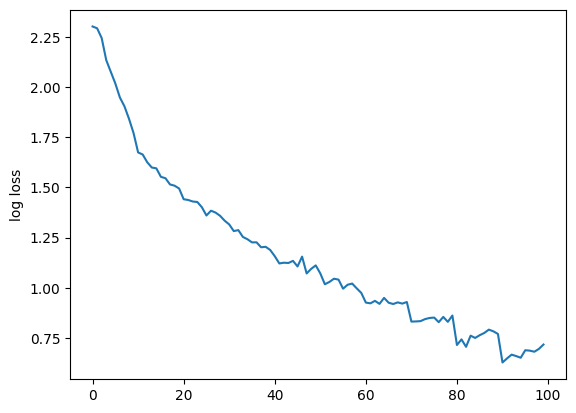

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 65.09 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.032825
Train Epoch: 2 	Loss: 0.012138
Train Epoch: 3 	Loss: 0.006680
Train Epoch: 4 	Loss: 0.004801
Train Epoch: 5 	Loss: 0.003968
Train Epoch: 6 	Loss: 0.003446
Train Epoch: 7 	Loss: 0.003143
Train Epoch: 8 	Loss: 0.002884
Train Epoch: 9 	Loss: 0.002705
Train Epoch: 10 	Loss: 0.002571
Train Epoch: 11 	Loss: 0.002452
Train Epoch: 12 	Loss: 0.002323
Train Epoch: 13 	Loss: 0.002207
Train Epoch: 14 	Loss: 0.002161
Train Epoch: 15 	Loss: 0.002044
Train Epoch: 16 	Loss: 0.001997
Train Epoch: 17 	Loss: 0.001928
Train Epoch: 18 	Loss: 0.001903
Train Epoch: 19 	Loss: 0.001814
Train Epoch: 20 	Loss: 0.001764


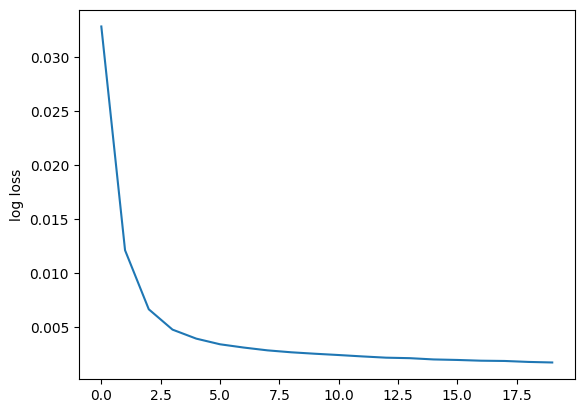

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [09:15<00:00, 18.00it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


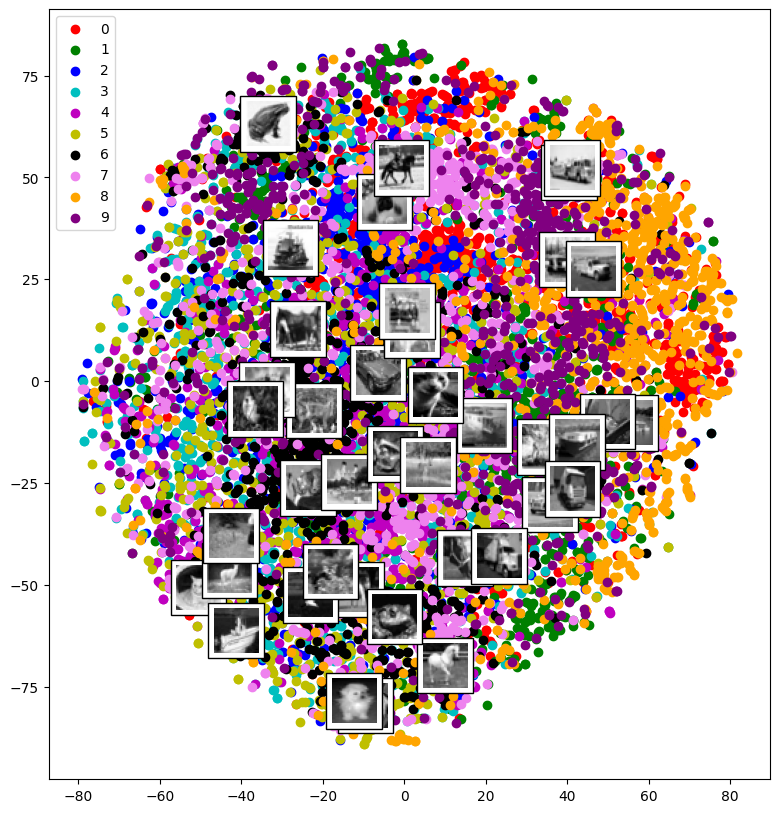

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [47:22<00:00, 17.59it/s]  


Files already downloaded and verified


100%|██████████| 10000/10000 [09:16<00:00, 17.96it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.6436

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [04:38<00:00, 17.95it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:57<00:00, 17.39it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.297
[epoch: 2, i:   499] avg mini-batch loss: 2.286
[epoch: 3, i:   499] avg mini-batch loss: 2.239
[epoch: 4, i:   499] avg mini-batch loss: 2.124
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.295
[epoch: 2, i:   499] avg mini-batch loss: 2.272
[epoch: 3, i:   499] avg mini-batch loss: 2.210
[epoch: 4, i:   499] avg mini-batch loss: 2.135
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.302
[epoch: 2, i:   499] avg mini-batch loss: 2.301
[epoch: 3, i:   499] avg mini-batch loss: 2.299
[epoch: 4, i:   499] avg mini-batch loss: 2.293
Files already downloaded and verified


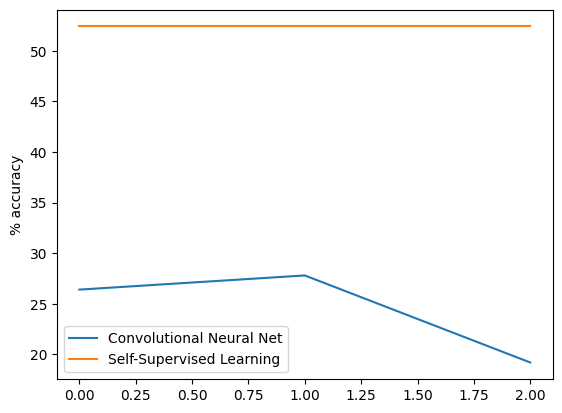

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[26.400000000000002, 27.800000000000004, 19.2]

In [21]:
svm_errors

[0.524, 0.524, 0.524]

In [22]:
conv_errors

[26.400000000000002, 27.800000000000004, 19.2]